In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
n_list = []
for filename in os.listdir("../../Data/vary-ratio"):
    if filename.startswith("n"):
        n_list.append(np.loadtxt("../../Data/vary-ratio/" + filename))

In [24]:
def coherent_exist(data):
    cut = 3 * len(data) // 4
    if np.max(data[:cut]) <= np.max(data[cut:]):
        return True
    else:
        return False
    

def frequency(array, timeStep):
    """
    Calculate Frequency of Oscillator

    Estimates frequency from crossings of n = 1 (because oscillator is
    centered on n = 1)

    Parameters
    ----------
    array - 1D thing oscillating around the value "1.0"
    timeStep - 1 / (sampling rate), or the time step of the thing

    Returns
    ----------
    freq - the calculated frequency
    """
    new = array[len(array) // 2 :]
    indices = []
    for i in range(len(new) - 1):
        av = 1.06
        if len(indices) == 0:
            if new[i+1] > av and new[i] < av:
                indices.append(i)
        else :
            if new[i+1] > av and new[i] < av and abs(i - indices[-1]) > 200:
                indices.append(i)
    if len(indices) >= 2:
        freq = 1. / (timeStep * (indices[1] - indices[0]))
    else:
        freq = 0
    return freq

In [25]:
ratios = [0.001, 0.250, 0.500, 0.750, 1.000, 1.250, 1.500, 1.750, 2.00, 3, 3.2, 3.4]
freqs = []
for list in n_list:
    freqs.append(frequency(list[:,-1], 0.001))
print(len(ratios), len(freqs))

12 12


(0, 1.5)

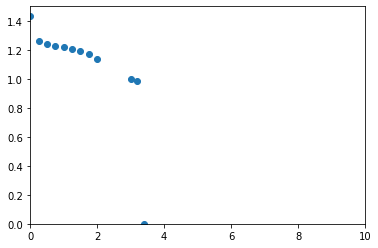

In [26]:
plt.scatter(ratios, np.array(freqs)*2*np.pi)
plt.xlim(0,10)
plt.ylim(0, 1.5)

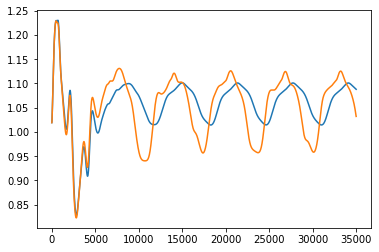

In [20]:
plt.plot(n_list[-2][:,-1])
plt.plot(n_list[-3][:,-1])